# Ablation study: Models

# Security Summary

#### Ticker: btcusdt-f

#### Trading fee
- Taker: 3bps
- Maker: 0bps after rebate

#### Trading hours: 24h

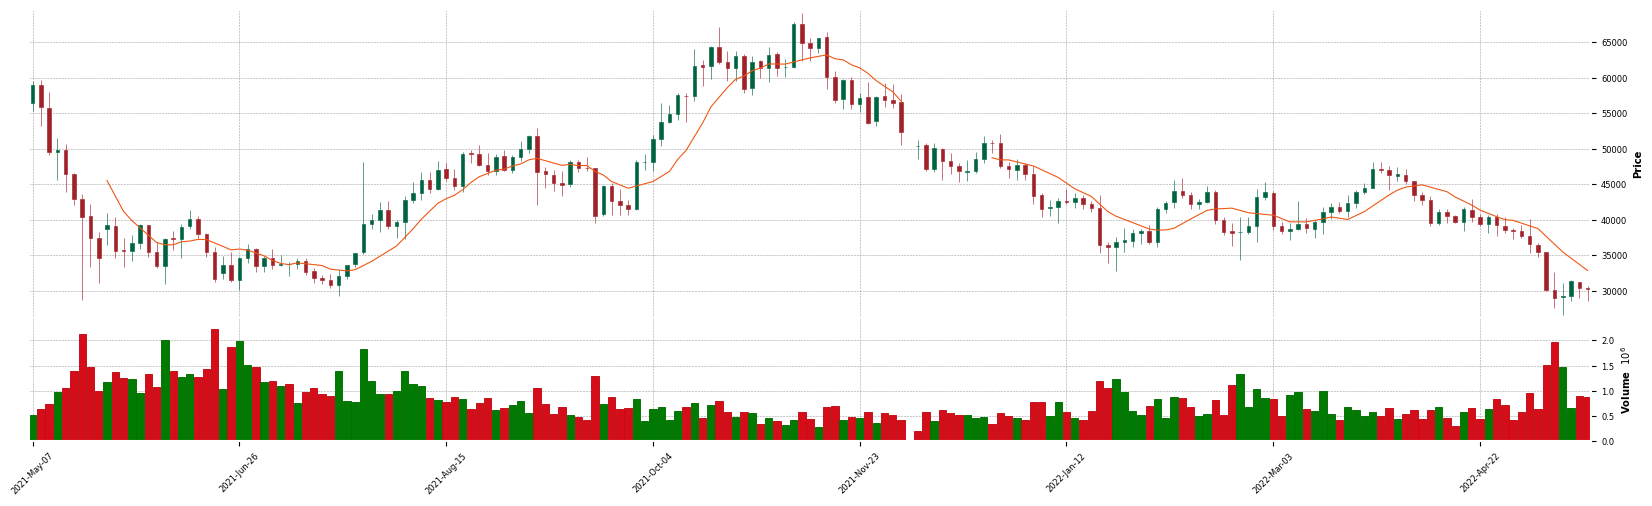

In [45]:
# OHLC

## 1-minute level statistics
- average_latency (in ms)
- max_latency (in ms)
- volume (in contract)
- trade_counts

In [50]:
# Median

Median:


latency_avg       2.235801
latency_max      36.412000
volume          158.405000
count          1781.000000
dtype: float64

In [51]:
# Mean

Mean:


latency_avg      77.219457
latency_max     161.310872
volume          282.746664
count          2741.498347
dtype: float64

## Distribution: Spread

Spread distribution on: 20220501



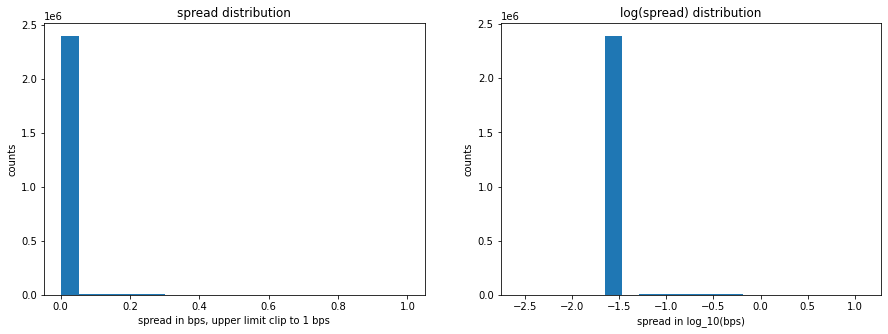

In [19]:
# Spread distribution

## Distribution: Best bid/ask size 

Best bid/ask quantity on: 20220501



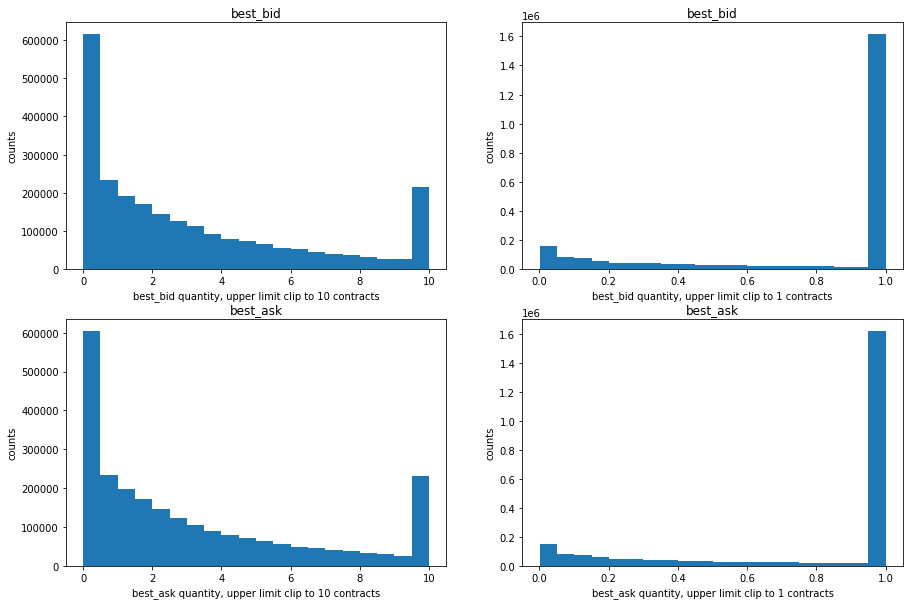

In [17]:
# Best bid/ask quantity

# Model/Strategy Report

## Dataset
- Number of features: 20
- Data available: 2021/05/07 - 2022/05/20
- Testing from: 2021/06/15 - 2022/05/20
- Dataset is resampled by 100ms, last observation in each 100ms window is used

## Models (regression problem)
- Linear (baseline)
    - Rolling training: previous 10d for training, the next 10d for testing
- LightGBM
    - Rolling training: previous 30d for training (10% validation set), the next 10d for testing
- Neural
    - Training: Train on 2021/05/07 - 2021/06/14, evaluate on the rest of data
    - Note that rolling training siginificantly improves the performance for Linear and LightGBM model
    - Due to hardware limitations, rolling training is currently not implemented for Neural model

## Simulators / Strategies

### Simulator: Naive
- Naive simulator is used to evaluate the model's prediction on extreme price movement
    - Return is measured by gain/loss after a fix time window (say 1s)
- Assumptions
    - No latency
    - Open position cost: taker fee (3 bps) + spread/2
    - Close position cost: none

### Simulator: sv0, sv1
- sv0, sv1 simulator are used to evaluate simple strategies which trade extreme price movement 
    - Trade on pre-defined thresholds on model prediction
    - After a position is opened, the model is allow to close or flip
    - Trade on fixed quantity (-1, 0, +1)
- sv0 Assumptions (trade on best bid/ask)
    - No latency
    - Open position cost: taker fee (3 bps) + spread/2
    - Close position cost: taker fee (3 bps) + spread/2
- sv1 Assumptions (trade on 0.1 quantity of observed LoB)
    - No latency
    - Open position cost: taker fee (3 bps) + slippage of 0.1 contract
    - Close position cost: taker fee (3 bps) + slippage of 0.1 contract
    
## Evaluation
- All monetary quantities are measured in bps, including:
    - initial_captial
    - avg_profit
    - std_profit
    - avg_winning 
    - avg_losing 
    - net_profit

## Simulator: Naive

,model,initial_captial,sharpe ratio,n_trades,annualized_return,winning_prct,avg_profit,std_profit,avg_winning,avg_losing,net_profit,max_drawdown_prct,max_consec_win,max_consec_lose
0,linear-12.5,10000,14.207,26680,556.689%,58.516%,1.944,23.153,8.256,-6.960,51855.924,19.647%,339,13
1,lgbm-retrain-5,10000,21.652,25862,669.845%,63.982%,2.413,18.567,6.410,-4.689,62396.522,5.37%,60,22
2,neural-h2-7.5,10000,20.098,26656,770.237%,61.765%,2.692,22.655,8.776,-7.137,71748.125,5.772%,278,20
3,neural-h4-8,10000,18.279,26656,657.998%,57.732%,2.299,21.280,10.685,-9.154,61292.955,9.258%,282,63
4,neural-h4-10,10000,18.279,26656,657.998%,57.732%,2.299,21.280,10.685,-9.154,61292.955,9.258%,282,63


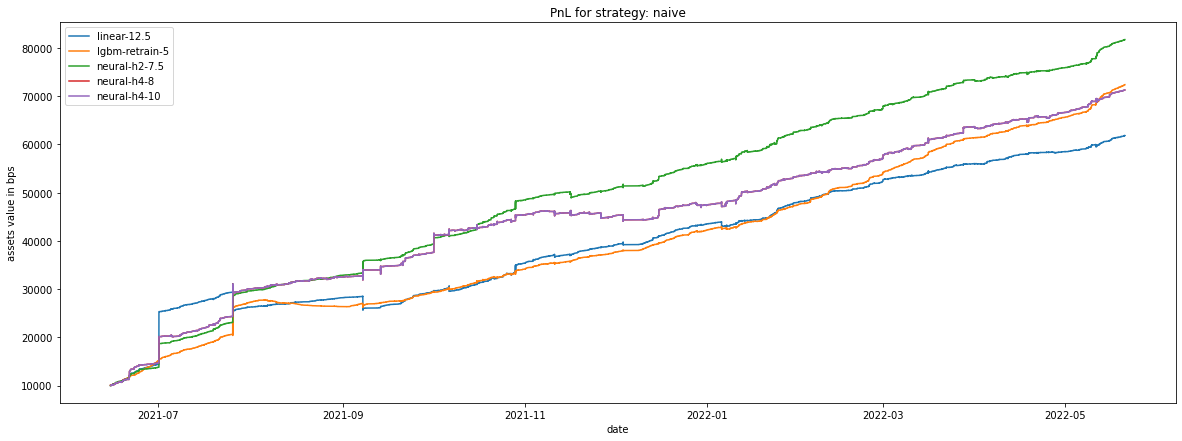

In [29]:
# 

## Simulator: sv0
- n_trades affect profit
- For the first 4 models, threshold is set, s.t., n_trades is ~12000-16000
- The last model shows that reducing n_trades could leads to better sharpe ratio

,model,initial_captial,sharpe ratio,n_trades,annualized_return,winning_prct,avg_profit,std_profit,avg_winning,avg_losing,net_profit,max_drawdown_prct,max_consec_win,max_consec_lose
0,linear-12.5,10000,-8.698,12893,-206.491%,35.546%,-1.492,20.178,9.137,-7.354,-19234.772,192.505%,11,27
1,lgbm-retrain-5,10000,4.663,12564,82.565%,47.564%,0.612,15.245,7.313,-5.466,7691.022,23.152%,16,20
2,neural-h2-7.5,10000,13.194,16591,288.002%,51.269%,1.617,16.356,10.000,-7.203,26827.550,7.985%,41,20
3,neural-h4-8,10000,14.926,14445,319.541%,53.354%,2.061,17.191,10.429,-7.511,29765.499,6.357%,38,17
4,neural-h4-10,10000,17.523,9072,344.392%,59.259%,3.536,19.916,12.003,-8.780,32080.350,3.943%,33,13


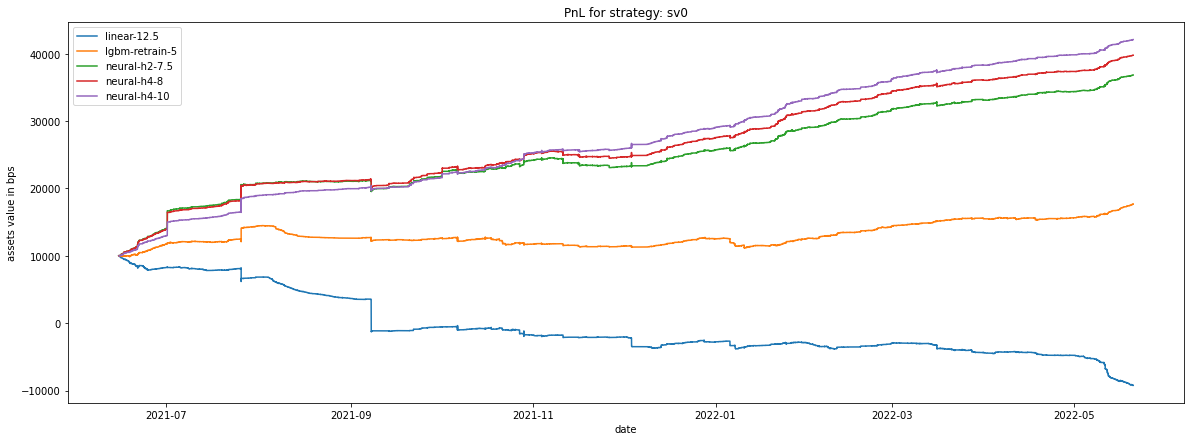

In [30]:
# 

## Simulator: sv1
- n_trades affect profit
- For the first 4 models, threshold is set, s.t., n_trades is ~12000-16000
- The last model shows that reducing n_trades could leads to better sharpe ratio

,model,initial_captial,sharpe ratio,n_trades,annualized_return,winning_prct,avg_profit,std_profit,avg_winning,avg_losing,net_profit,max_drawdown_prct,max_consec_win,max_consec_lose
0,linear-12.5,10000,-18.601,12893,-449.11%,31.552%,-3.245,20.523,8.518,-8.667,-41834.911,418.482%,10,31
1,lgbm-retrain-5,10000,-0.116,12564,-2.013%,44.906%,-0.015,14.964,7.213,-5.906,-187.553,50.786%,12,30
2,neural-h2-7.5,10000,2.837,16591,62.499%,47.731%,0.351,16.505,9.519,-8.021,5821.867,45.258%,31,21
3,neural-h4-8,10000,4.995,14445,108.006%,49.685%,0.696,17.363,9.909,-8.400,10060.860,32.399%,28,19
4,neural-h4-10,10000,9.045,9072,179.968%,55.534%,1.848,20.162,11.307,-9.965,16764.125,12.808%,23,21


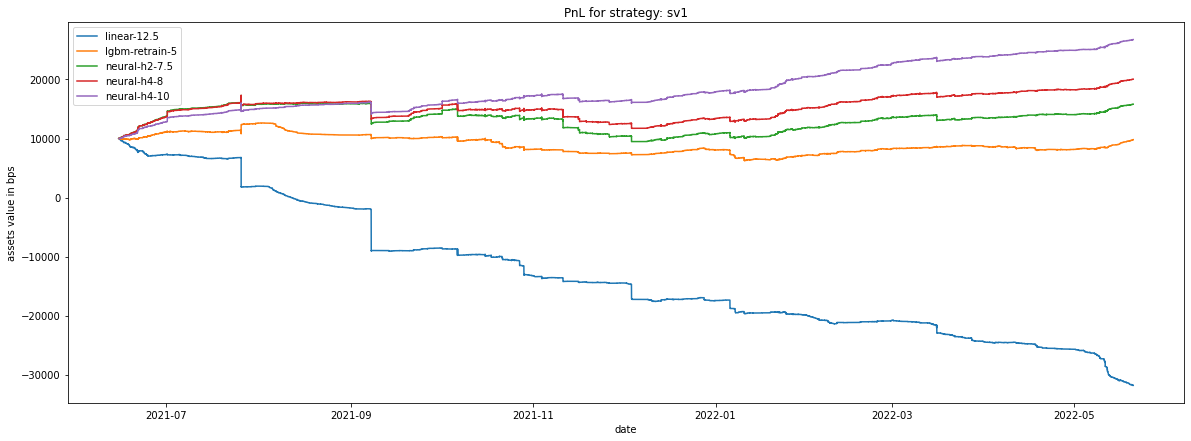

In [31]:
# 

# Analysis of outliers
- Observe that there are multiple jumps in PnL for all models
- This is due to jump in asset price
- Current strategy does not handle price jump well

In [141]:
# trade PnL < -200

2647   2021-07-26 01:01:44.100
2708   2021-07-26 01:01:57.500
2711   2021-07-26 01:01:58.200
2743   2021-07-26 01:02:13.900
2744   2021-07-26 01:02:14.100
2762   2021-07-26 01:02:19.000
2766   2021-07-26 01:02:19.900
2767   2021-07-26 01:02:20.000
2775   2021-07-26 01:02:21.100
6336   2021-11-03 18:00:31.400
dtype: datetime64[ns]

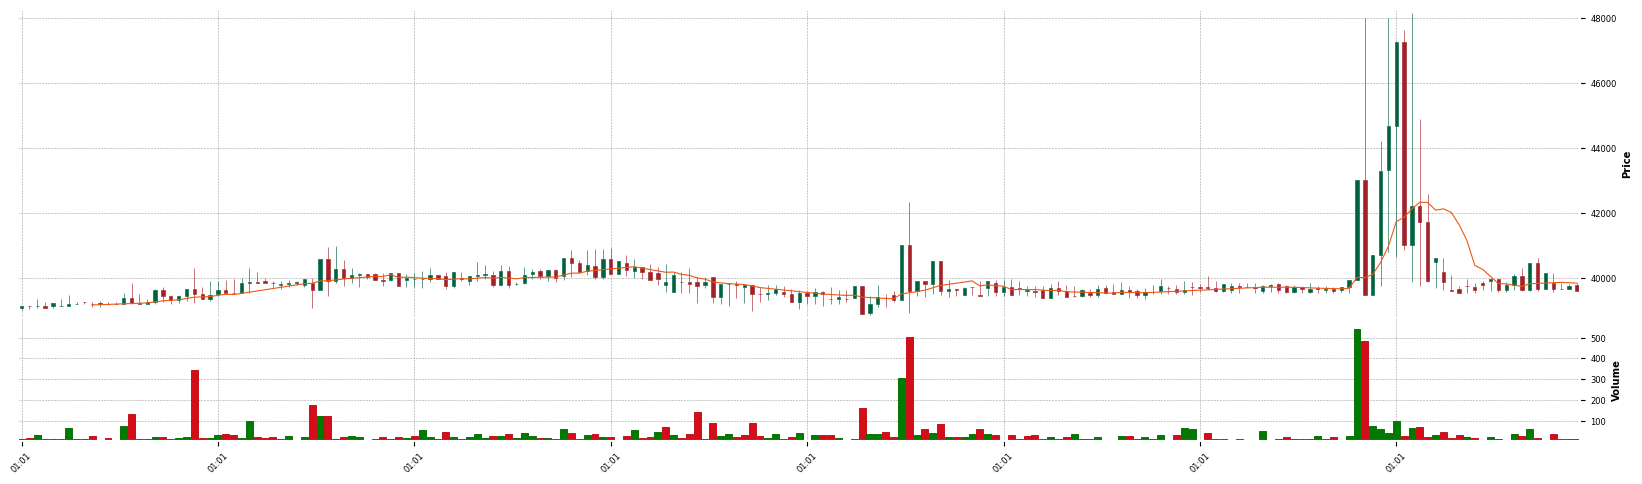

In [146]:
# '2021-07-26 01:01:40' - '2021-07-26 01:02:00'

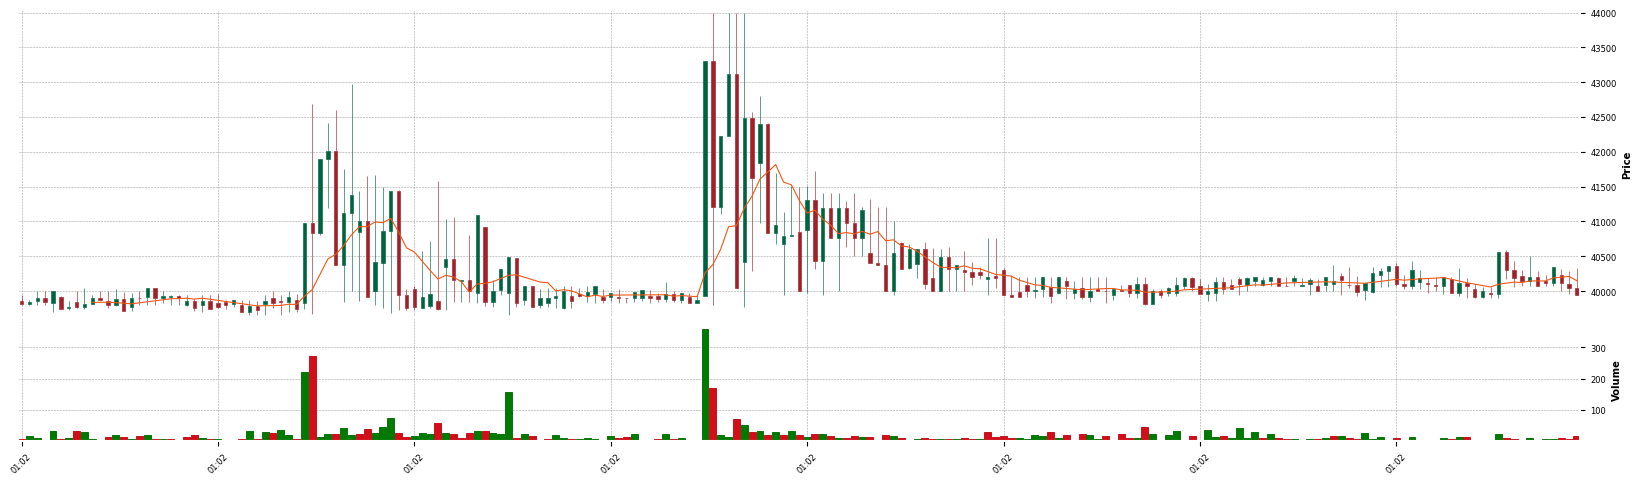

In [147]:
# '2021-07-26 01:02:10' - '2021-07-26 01:02:30'